A learning curve is a correlation between a learner’s performance on a task and the number of attempts or time required to complete the task; this can be represented as a direct proportion on a graph.

In [1]:
from sklearn.model_selection import learning_curve

In [2]:
# data
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [4]:
train_sizes, train_scores, valid_scores = learning_curve(
    lin_reg, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error"
)

In [5]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

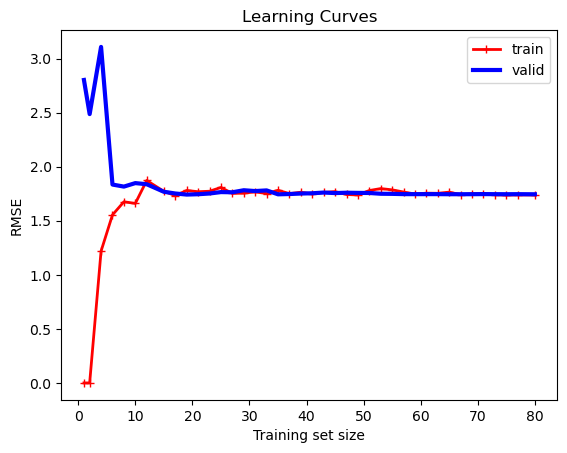

In [6]:
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "-b", linewidth=3, label="valid")

plt.title("Learning Curves")
plt.xlabel("Training set size")
plt.ylabel("RMSE")

plt.legend()
plt.show()

The model is overfitting here as the generated data is nonlinear, so normal LinearRegression does not just fit with the training data. If the model is underfitting, adding more instances will not help at all. We need to come up with an another model or better features. 

Now let's 10-th degree polynomial model and see the learning curve.

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_reg = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False), lin_reg
)

In [8]:
train_sizes, train_scores, valid_scores = learning_curve(
    poly_reg, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error"
)

In [9]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

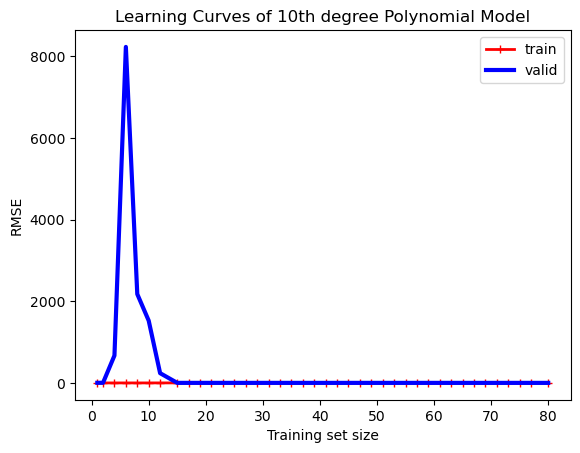

In [10]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "-b", linewidth=3, label="valid")

plt.title("Learning Curves of 10th degree Polynomial Model")
plt.xlabel("Training set size")
plt.ylabel("RMSE")

plt.legend()
plt.show()

This one looks better than the previous one. However, there is a chance for overfitting the training data. One way to improve overfitting is to feed the model more training data untill the validation error reaches the training error.